In [8]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
with open('data/vicuna_metrics.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
print(data.keys())

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.2.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.65.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-13B_qa_arxiv_0.35.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_arxiv_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.35.pkl', 'answe

In [4]:
# load the news data
news = {}

for key, value in data.items():
    if 'news' in key:
        news[key] = value

In [5]:
news.keys()

dict_keys(['answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_news_0.8.pkl', 'answer_vicuna-13B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_news_0.65.pkl', 'answer_vicuna-7B_qa_news_0.8.pkl', 'answer_vicuna-13B_reconstruction_news_0.65.pkl', 'answer_vicuna-13B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_news_0.8.pkl', 'answer_vicuna-7B_reconstruction_news_0.35.pkl', 'answer_vicuna-13B_

In [6]:
news['answer_vicuna-7B_reconstruction_news_0.5.pkl']

{'self-info-phrase': {'bleu': 0.338889857921479,
  'precisions': [0.6806633677454034,
   0.4078666096622488,
   0.26512616370355097,
   0.17919717884771177],
  'brevity_penalty': 1.0,
  'length_ratio': 1.0410131498823259,
  'translation_length': 63253,
  'reference_length': 60761,
  'meteor': 0.5207793765738441,
  'rouge1': 0.6857610003152779,
  'rouge2': 0.4293908504051747,
  'rougeL': 0.49402448672323584,
  'rougeLsum': 0.5767322766443373,
  'bertscore_precision': 0.84720749437809,
  'bertscore_recall': 0.8623721522092819,
  'bertscore_f1': 0.8547030365467072},
 'Random-phrase': {'bleu': 0.3071873477439167,
  'precisions': [0.7174134507467841,
   0.40008648274669206,
   0.2436628259551243,
   0.1549770025167057],
  'brevity_penalty': 0.9520468983092021,
  'length_ratio': 0.9531607445565412,
  'translation_length': 57915,
  'reference_length': 60761,
  'meteor': 0.4837598939166751,
  'rouge1': 0.6803399481405381,
  'rouge2': 0.38526678489607485,
  'rougeL': 0.5060254287408206,
  'roug

## 1.bleu

In [19]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
arxiv_bleu_values = {reduction: [] for reduction in reduction_values}
news_bleu_values = {reduction: [] for reduction in reduction_values}
arxiv_bleu_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [20]:
for key in data.keys():
    if 'arxiv_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                arxiv_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
    elif 'news_' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                news_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
arxiv_bleu_values

{0.2: [0.5458896493997193,
  0.6367160656269641,
  0.660639955828338,
  0.39300186234259593,
  0.5363006794059053,
  0.3561253395334144],
 0.35: [0.5597119763976033,
  0.29124032038880093,
  0.5594925308719025,
  0.31459615814608444,
  0.4584889336875391,
  0.46262161899600845],
 0.5: [0.36788000846799745,
  0.36487309356791037,
  0.4869484948993058,
  0.22298641533650118,
  0.4879472803635215,
  0.22791488013810943],
 0.65: [0.14657801065989928,
  0.22413290613128736,
  0.14986272813509205,
  0.4244104419614452,
  0.2187111599150765,
  0.4124799166654756],
 0.8: [0.08632604013788117,
  0.37379658825847556,
  0.08294782621290801,
  0.06987563696817854,
  0.07543446925518706,
  0.3919659310810072]}

In [18]:
# calculate the avarage bleu
arxiv_average_bleu = [np.mean(arxiv_bleu_values[reduction]) for reduction in reduction_values]
news_average_bleu = [np.mean(news_bleu_values[reduction]) for reduction in reduction_values]
arxiv_average_bleu,news_average_bleu

([0.5214455920228228,
  0.44102525641465656,
  0.3597583621288909,
  0.262695860578046,
  0.1800577486522729],
 [0.5183898807906051,
  0.43148213661636053,
  0.3513750708695605,
  0.2510165281070632,
  0.16511784653959358])

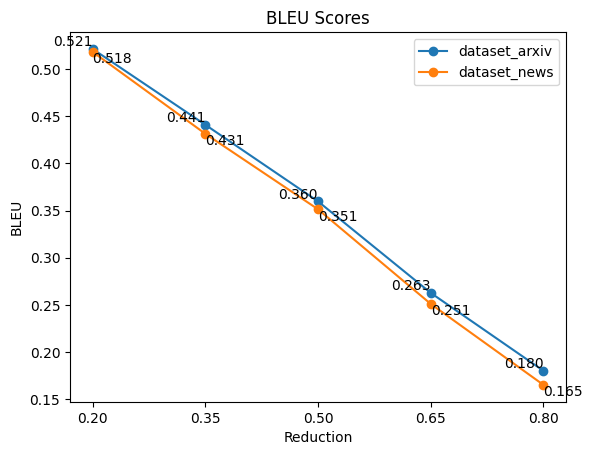

In [33]:
# Plot results
plt.plot(reduction, arxiv_average_bleu, 'o-', label='dataset_arxiv')
plt.plot(reduction, news_average_bleu, 'o-', label='dataset_news')

#Add data point
# for x, y in zip(reduction, arxiv_average_bleu):
#     plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
#     plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
for x, y in zip(reduction, arxiv_average_bleu):
    plt.text(x, y, f'{y:.3f}', ha='right', va='bottom')
for x, y in zip(reduction, news_average_bleu):
    plt.text(x, y, f'{y:.3f}', ha='left', va='top')

plt.title('BLEU Scores')
plt.xlabel('Reduction')
plt.ylabel('BLEU')

plt.xticks(reduction)

plt.legend()
plt.show()
